In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 19 20:12:49 2019

@author: lamnn-tt
"""


"""
SUMMARY
================================================================================

These files contain 1000209 anonymous ratingDataset of approximately 3, 900 movies made by 6040 MovieLens users who
joined MovieLens in 2000.

USAGE LICENSE
================================================================================

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under the following conditions:
 * The user may not state or imply any endorsement from the
       University of Minnesota or the GroupLens Research Group.

     * The user must acknowledge the use of the data set in
       publications resulting from the use of the data set
       (see below for citation information).

     * The user may not redistribute the data without separate
       permission.

     * The user may not use this information for any commercial or
       revenue-bearing purposes without first obtaining permission
       from a faculty member of the GroupLens Research Project at the
       University of Minnesota.

If you have any further questions or comments, please contact GroupLens
<grouplens-info@cs.umn.edu>.

CITATION
================================================================================
To acknowledge use of the dataset in publications, please cite the following
paper:

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History
and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4,
Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872

ACKNOWLEDGEMENTS
================================================================================
Thanks to Shyong Lam and Jon Herlocker for cleaning up and generating the data
set.

FURTHER INFORMATION ABOUT THE GROUPLENS RESEARCH PROJECT
================================================================================

The GroupLens Research Project is a research group in the Department of
Computer Science and Engineering at the University of Minnesota. Members of
the GroupLens Research Project are involved in many research projects related
to the fields of information filtering, collaborative filtering, and
recommendation systems. The project is lead by professors John Riedl and Joseph
Konstan. The project began to explore automated collaborative filtering in
1992, but is most well known for its world wide trial of an automated
collaborative filtering system for Usenet news in 1996. Since then the project
has expanded its scope to research overall information filtering solutions,
integrating in content-based methods as well as improving current collaborative
filtering technology.

Further information on the GroupLens Research project, including research
publications, can be found at the following web site:

        http://www.grouplens.org/

GroupLens Research currently operates a movie recommender based on
collaborative filtering:

        http://www.movielens.org/

RATINGS FILE DESCRIPTION
================================================================================

All ratingDataset are contained in the file "ratingDataset.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratingDataset only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratingDataset

USERS FILE DESCRIPTION
================================================================================

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

MOVIES FILE DESCRIPTION
================================================================================

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

def find_all(name, path):
    result = []
    for root, dirs, files in os.walk(path):
        for filename in files:
            if re.search(name, filename) != None:
                result.append(os.path.join(root, filename))
    return result

# importing dataset
try:
    movienames = ['MovieID', 'Title', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary'
        , 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War'
        , 'Western']
    movieDataset = pd.read_csv('ml-1m/processed_movies.dat', '|', header = None, names = movienames)
except FileNotFoundError:
    movieDataset = pd.read_csv('ml-1m/movies.dat', '::', header = None, names = ['MovieID', 'Title', 'Genres'])
    print('Pre-processing item dataset.')
    movieDataset['Action'] = np.zeros((movieDataset.shape[0], 1))
    movieDataset['Adventure'] = np.zeros((movieDataset.shape[0], 1))
    movieDataset['Animation'] = np.zeros((movieDataset.shape[0], 1))
    movieDataset['Children'] = np.zeros((movieDataset.shape[0], 1))
    movieDataset['Comedy'] = np.zeros((movieDataset.shape[0], 1))
    movieDataset['Crime'] = np.zeros((movieDataset.shape[0], 1))
    movieDataset['Documentary'] = np.zeros((movieDataset.shape[0], 1))
    movieDataset['Drama'] = np.zeros((movieDataset.shape[0], 1))
    movieDataset['Fantasy'] = np.zeros((movieDataset.shape[0], 1))
    movieDataset['Film-Noir'] = np.zeros((movieDataset.shape[0], 1))
    movieDataset['Horror'] = np.zeros((movieDataset.shape[0], 1))
    movieDataset['Musical'] = np.zeros((movieDataset.shape[0], 1))
    movieDataset['Mystery'] = np.zeros((movieDataset.shape[0], 1))
    movieDataset['Romance'] = np.zeros((movieDataset.shape[0], 1))
    movieDataset['Sci-Fi'] = np.zeros((movieDataset.shape[0], 1))
    movieDataset['Thriller'] = np.zeros((movieDataset.shape[0], 1))
    movieDataset['War'] = np.zeros((movieDataset.shape[0], 1))
    movieDataset['Western'] = np.zeros((movieDataset.shape[0], 1))
    # movieDataset['No-genre'] = np.zeros((movieDataset.shape[0], 1)) no default behaviors

    genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
    
    for i in range(movieDataset.shape[0]):
        itemGenres = movieDataset.iloc[i, :].Genres.split('|')
        for itemGenre in itemGenres:
            if itemGenre in genres:
                movieDataset.iloc[i, 3 + genres.index(itemGenre)] = 1
            elif itemGenre == 'Children\'s' or itemGenre == 'children\'s':
                movieDataset.iloc[i, 3 + genres.index('Children')] = 1
            else:
                # movieDataset.iloc[i, 21] = 1 no default behaviors
                continue

    to_new_dataset = list(range(21))
    to_new_dataset.remove(2)
    movieDataset = movieDataset.iloc[:, to_new_dataset]
    movieDataset.to_csv('ml-1m/processed_movies.dat', '|', index = False, header = False)
finally:
    try:
        usernames = ["UserId", "Gender", "Age", "Zipcode", "other", "academic", "artist", "clerical", "college",
                     "customer_service", "health care", "managerial", "farmer", "homemaker", "K-12 student", "lawyer",
                     "programmer", "retired", "sales", "scientist", "self-employed", "technician", "tradesman",
                     "unemployed", "writer"]
        userDataset = pd.read_csv('ml-1m/processed_users.dat', '|', header = None, names = usernames)
    except FileNotFoundError:
        userDataset = pd.read_csv('ml-1m/users.dat', '::', header = None,
                                  names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
        print('Pre-processing user dataset.')
        keys = list(range(21))
        occupations = ["other", "academic", "artist", "clerical", "college", "customer_service", "health care",
                       "managerial", "farmer", "homemaker", "K-12 student", "lawyer", "programmer", "retired", "sales",
                       "scientist", "self-employed", "technician", "tradesman", "unemployed", "writer"]
        occupations = dict(zip(keys, occupations))
        for occupation in list(occupations.values()):
            userDataset[occupation] = np.zeros((userDataset.shape[0], 1))

        for i in range(userDataset.shape[0]):
            user = userDataset.iloc[i, :]
            if user.Gender == 'M':
                userDataset.iloc[i, 1] = 1
            elif user.Gender == 'F':
                userDataset.iloc[i, 1] = 0
            elif user.Gender == 1 or user.Gender == 0:
                print('Already encode genders')
            else:
                print('Corrupted or wrong input. Break!')
                break

            occupation = user.Occupation
            if occupation not in list(occupations):
                userDataset.iloc[i, 5] = 1
            else:
                userDataset.iloc[i, 5 + occupation] = 1

        to_new_dataset = list(range(userDataset.shape[1]))
        to_new_dataset.remove(3)
        userDataset = userDataset.iloc[:, to_new_dataset]
        userDataset.to_csv('ml-1m/processed_users.dat', '|', index = False, header = False)
    finally:
        ratingDataset = pd.read_csv('ml-1m/ratings.dat', '::', header = None,
                                    names = ['UserID', 'MovieID', 'Rating', 'Timestamp'])


users = userDataset.iloc[:, :].values
ratings = ratingDataset.iloc[:, [0, 1, 2]].values

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder_users = LabelEncoder()
users[:, 3] = labelEncoder_users.fit_transform(users[:, 3])

oneHotEncoder = OneHotEncoder(categorical_features = [3])
users = oneHotEncoder.fit_transform(users).toarray()

from sklearn.cluster import KMeans

print('We will choose number of cluster = 3.')

#K-means
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_init = 20, random_state = 0)
y_kmeans = kmeans.fit_predict(users)

g1 = []
g2 = []
g3 = []

for i in range(len(y_kmeans)):
    if y_kmeans[i] == 0:
        g1.append(i)
    elif y_kmeans[i] == 1:
        g2.append(i)
    else:
        g3.append(i)

# users into 3 groups
groupOne = userDataset.iloc[g1, :].reset_index(drop = True)
groupTwo = userDataset.iloc[g2, :].reset_index(drop = True)
groupThree = userDataset.iloc[g3, :].reset_index(drop = True)

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:281: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: Deprecati

We will choose number of cluster = 3.


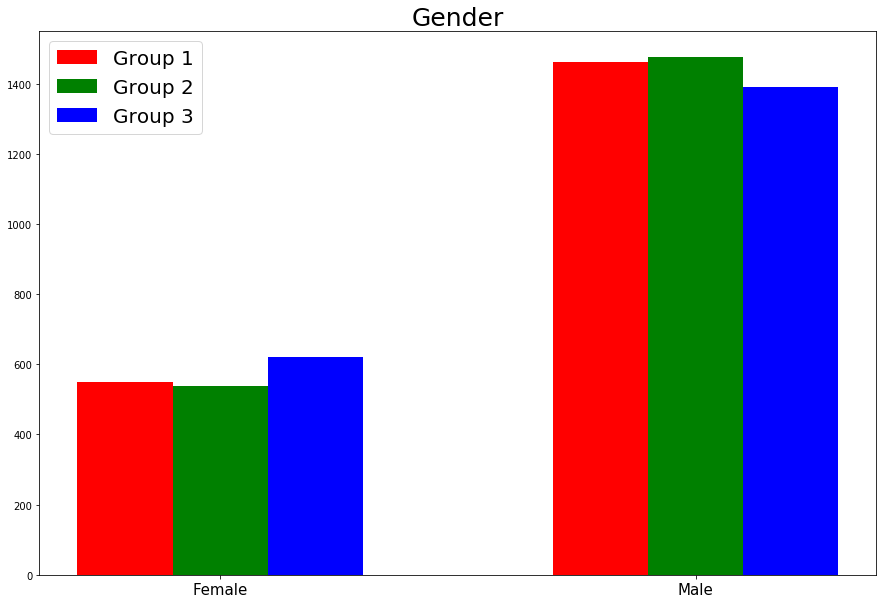

In [15]:
"""
Data Visualization - Gender
"""

data1 = np.array(groupOne['Gender'])
data2 = np.array(groupTwo['Gender'])
data3 = np.array(groupThree['Gender'])

dataGenderGroup1 = ([np.count_nonzero(data1 == 0), np.count_nonzero(data1 == 1)])
dataGenderGroup2 = ([np.count_nonzero(data2 == 0), np.count_nonzero(data2 == 1)])
dataGenderGroup3 = ([np.count_nonzero(data3 == 0), np.count_nonzero(data3 == 1)])
#print(dataGenderGroup1)
#print(dataGenderGroup2)
#print(dataGenderGroup3)

barWidth = 0.2

genders1 = [0, 1]
genders2 = []
genders3 = []

for item in genders1:
    genders2.append(item + barWidth)
    genders3.append(item + barWidth * 2)

fig, ax = plt.subplots(figsize=(15,10))
bar1 = ax.bar(genders1, dataGenderGroup1, width = barWidth, color='r')
bar2 = ax.bar(genders2, dataGenderGroup2, width = barWidth, color='g')
bar3 = ax.bar(genders3, dataGenderGroup3, width = barWidth, color='b')
ax.legend(['Group 1', 'Group 2', 'Group 3'], fontsize = 20)
ax.set_xticks(genders2)
ax.set_xticklabels(['Female', 'Male'], fontSize = 15)

#def autolabel(rects):
#    """Attach a text label above each bar in *rects*, displaying its height."""
#    for rect in rects:
#        height = rect.get_height()
#        ax.annotate('{}'.format(height),
#                    xy=(rect.get_x() + rect.get_width() / 2, height),
#                    xytext=(0, 3),  # 3 points vertical offset
#                    textcoords="offset points",
#                    ha='center', va='bottom',)

#autolabel(bar1)
#autolabel(bar2)
#autolabel(bar3)
plt.title('Gender', fontSize = 25)
plt.show()

# data1 = (np.array(groupOne['Gender']), np.array(groupOne['Age']))
# data2 = (np.array(groupTwo['Gender']), np.array(groupTwo['Age']))
# data3 = (np.array(groupThree['Gender']), np.array(groupThree['Age']))

# datas = (data1, data2, data3)
# colors = ("red", "green", "blue")
# markers = ('^', 'o', '*')
# groups = ("Group 1", "Group 2", "Group 3")

# plt.figure(figsize=(15,15))
# for data, color, marker, group in zip(datas, colors, markers, groups):
#     x, y = data
#     plt.scatter(x, y, alpha=0.8, c=color, s=5, marker=marker, label=group)

# plt.title('Gender - Age')
# plt.xlabel('Gender')
# plt.ylabel('Age')
# plt.legend()
# plt.show()

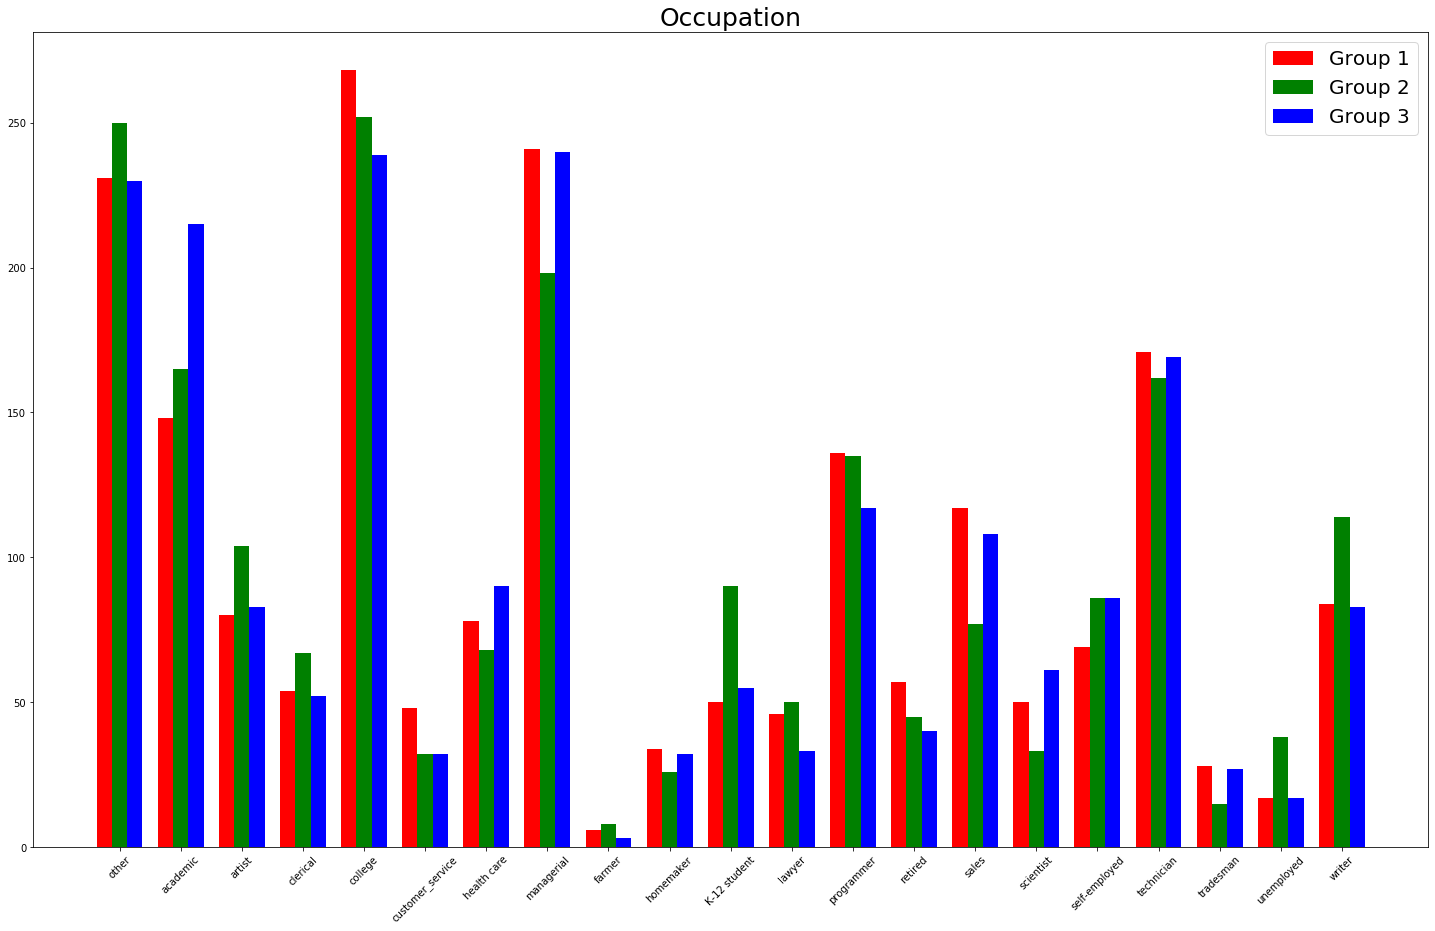

In [13]:
"""
Occupation
"""

occupationLabel = ['other', 'academic', 'artist', 'clerical', 'college', 
                  'customer_service', 'health care', 'managerial', 'farmer', 'homemaker',
                  'K-12 student', 'lawyer', 'programmer', 'retired', 'sales',
                  'scientist', 'self-employed', 'technician', 'tradesman', 'unemployed', 'writer']

occupationNumber1 = np.arange(21)
occupationNumber2 = []
occupationNumber3 = []

barWidth = 0.25

for item in occupationNumber1:
    occupationNumber2.append(item + barWidth)
    occupationNumber3.append(item + barWidth * 2)

occupation1 = np.zeros((21,), dtype=np.int)
occupation2 = np.zeros((21,), dtype=np.int)
occupation3 = np.zeros((21,), dtype=np.int)

# print(occupation1)

for index in range(len(groupOne)):
    if groupOne.loc[index,'other'] == 1: occupation1[0] += 1
    elif groupOne.loc[index,'academic'] == 1: occupation1[1] += 1
    elif groupOne.loc[index,'artist'] == 1: occupation1[2] += 1
    elif groupOne.loc[index,'clerical'] == 1: occupation1[3] += 1
    elif groupOne.loc[index,'college'] == 1: occupation1[4] += 1
    elif groupOne.loc[index,'customer_service'] == 1: occupation1[5] += 1
    elif groupOne.loc[index,'health care'] == 1: occupation1[6] += 1
    elif groupOne.loc[index,'managerial'] == 1: occupation1[7] += 1
    elif groupOne.loc[index,'farmer'] == 1: occupation1[8] += 1
    elif groupOne.loc[index,'homemaker'] == 1: occupation1[9] += 1
    elif groupOne.loc[index,'K-12 student'] == 1: occupation1[10] += 1
    elif groupOne.loc[index,'lawyer'] == 1: occupation1[11] += 1
    elif groupOne.loc[index,'programmer'] == 1: occupation1[12] += 1
    elif groupOne.loc[index,'retired'] == 1: occupation1[13] += 1
    elif groupOne.loc[index,'sales'] == 1: occupation1[14] += 1
    elif groupOne.loc[index,'scientist'] == 1: occupation1[15] += 1
    elif groupOne.loc[index,'self-employed'] == 1: occupation1[16] += 1
    elif groupOne.loc[index,'technician'] == 1: occupation1[17] += 1
    elif groupOne.loc[index,'tradesman'] == 1: occupation1[18] += 1
    elif groupOne.loc[index,'unemployed'] == 1: occupation1[19] += 1
    elif groupOne.loc[index,'writer'] == 1: occupation1[20] += 1
    
for index in range(len(groupTwo)):
    if groupTwo.loc[index,'other'] == 1: occupation2[0] += 1
    elif groupTwo.loc[index,'academic'] == 1: occupation2[1] += 1
    elif groupTwo.loc[index,'artist'] == 1: occupation2[2] += 1
    elif groupTwo.loc[index,'clerical'] == 1: occupation2[3] += 1
    elif groupTwo.loc[index,'college'] == 1: occupation2[4] += 1
    elif groupTwo.loc[index,'customer_service'] == 1: occupation2[5] += 1
    elif groupTwo.loc[index,'health care'] == 1: occupation2[6] += 1
    elif groupTwo.loc[index,'managerial'] == 1: occupation2[7] += 1
    elif groupTwo.loc[index,'farmer'] == 1: occupation2[8] += 1
    elif groupTwo.loc[index,'homemaker'] == 1: occupation2[9] += 1
    elif groupTwo.loc[index,'K-12 student'] == 1: occupation2[10] += 1
    elif groupTwo.loc[index,'lawyer'] == 1: occupation2[11] += 1
    elif groupTwo.loc[index,'programmer'] == 1: occupation2[12] += 1
    elif groupTwo.loc[index,'retired'] == 1: occupation2[13] += 1
    elif groupTwo.loc[index,'sales'] == 1: occupation2[14] += 1
    elif groupTwo.loc[index,'scientist'] == 1: occupation2[15] += 1
    elif groupTwo.loc[index,'self-employed'] == 1: occupation2[16] += 1
    elif groupTwo.loc[index,'technician'] == 1: occupation2[17] += 1
    elif groupTwo.loc[index,'tradesman'] == 1: occupation2[18] += 1
    elif groupTwo.loc[index,'unemployed'] == 1: occupation2[19] += 1
    elif groupTwo.loc[index,'writer'] == 1: occupation2[20] += 1
    
for index in range(len(groupThree)):
    if groupThree.loc[index,'other'] == 1: occupation3[0] += 1
    elif groupThree.loc[index,'academic'] == 1: occupation3[1] += 1
    elif groupThree.loc[index,'artist'] == 1: occupation3[2] += 1
    elif groupThree.loc[index,'clerical'] == 1: occupation3[3] += 1
    elif groupThree.loc[index,'college'] == 1: occupation3[4] += 1
    elif groupThree.loc[index,'customer_service'] == 1: occupation3[5] += 1
    elif groupThree.loc[index,'health care'] == 1: occupation3[6] += 1
    elif groupThree.loc[index,'managerial'] == 1: occupation3[7] += 1
    elif groupThree.loc[index,'farmer'] == 1: occupation3[8] += 1
    elif groupThree.loc[index,'homemaker'] == 1: occupation3[9] += 1
    elif groupThree.loc[index,'K-12 student'] == 1: occupation3[10] += 1
    elif groupThree.loc[index,'lawyer'] == 1: occupation3[11] += 1
    elif groupThree.loc[index,'programmer'] == 1: occupation3[12] += 1
    elif groupThree.loc[index,'retired'] == 1: occupation3[13] += 1
    elif groupThree.loc[index,'sales'] == 1: occupation3[14] += 1
    elif groupThree.loc[index,'scientist'] == 1: occupation3[15] += 1
    elif groupThree.loc[index,'self-employed'] == 1: occupation3[16] += 1
    elif groupThree.loc[index,'technician'] == 1: occupation3[17] += 1
    elif groupThree.loc[index,'tradesman'] == 1: occupation3[18] += 1
    elif groupThree.loc[index,'unemployed'] == 1: occupation3[19] += 1
    elif groupThree.loc[index,'writer'] == 1: occupation3[20] += 1
    
fig, ax = plt.subplots(figsize=(25,15))
bar1 = ax.bar(occupationNumber1, occupation1, width = barWidth, color='r')
bar2 = ax.bar(occupationNumber2, occupation2, width = barWidth, color='g')
bar3 = ax.bar(occupationNumber3, occupation3, width = barWidth, color='b')
ax.legend(['Group 1', 'Group 2', 'Group 3'], fontsize = 20)
ax.set_xticks(occupationNumber2)
ax.set_xticklabels(occupationLabel, fontSize=10, rotation=45)

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom',)

# autolabel(bar1)
# autolabel(bar2)
# autolabel(bar3)
plt.title('Occupation', fontSize = 25)
plt.show()

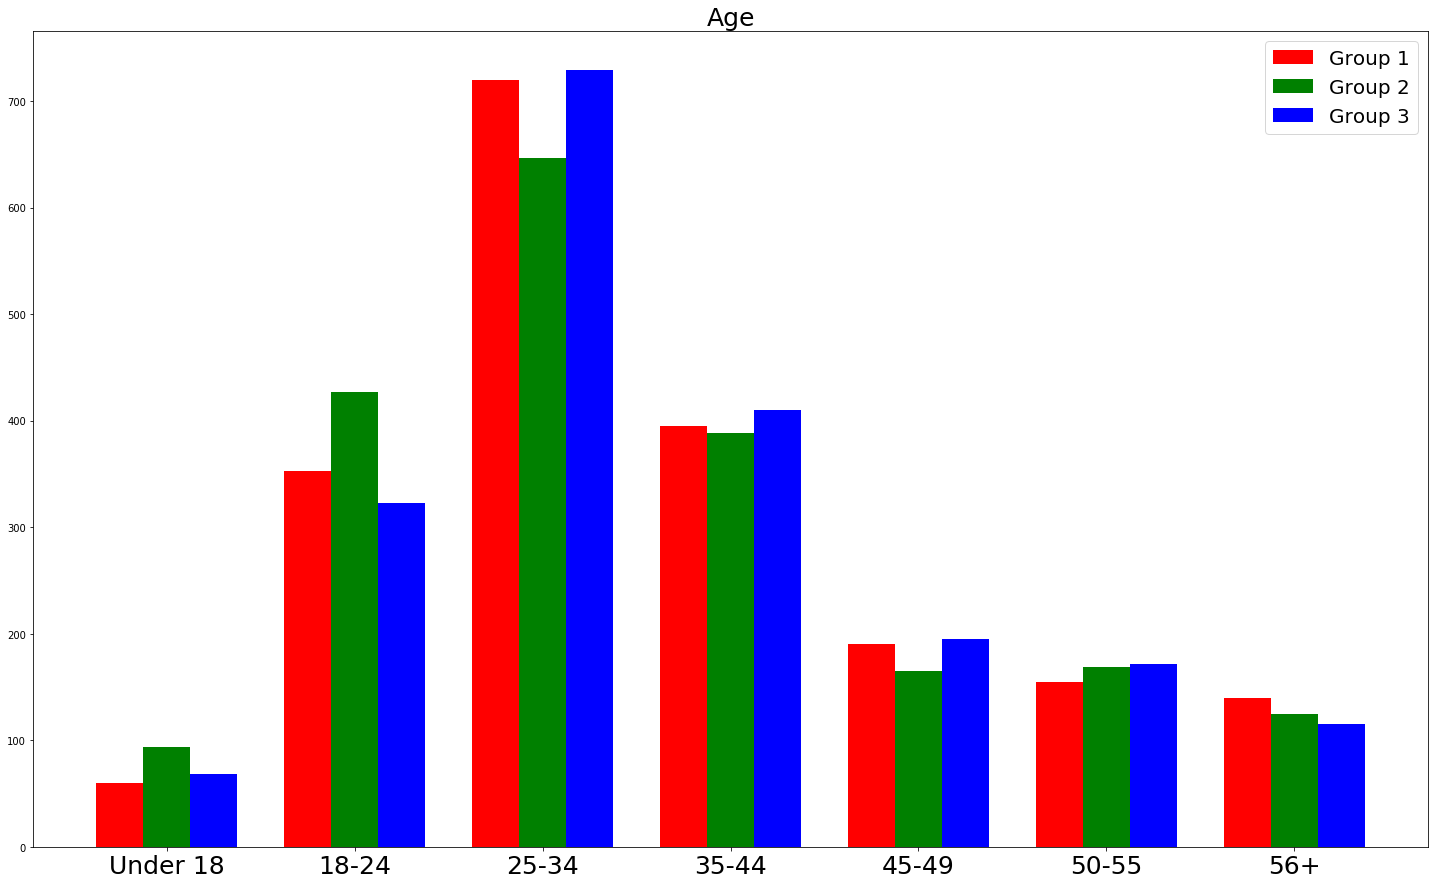

In [14]:
"""
Age
"""

ageLabel = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']

ageNumber1 = np.arange(7)
ageNumber2 = []
ageNumber3 = []

barWidth = 0.25

for item in ageNumber1:
    ageNumber2.append(item + barWidth)
    ageNumber3.append(item + barWidth * 2)

age1 = np.zeros((7,), dtype=np.int)
age2 = np.zeros((7,), dtype=np.int)
age3 = np.zeros((7,), dtype=np.int)

# print(age1)

for index in range(len(groupOne)):
    if groupOne.loc[index,'Age'] == 1: age1[0] += 1
    elif groupOne.loc[index,'Age'] == 18: age1[1] += 1
    elif groupOne.loc[index,'Age'] == 25: age1[2] += 1
    elif groupOne.loc[index,'Age'] == 35: age1[3] += 1
    elif groupOne.loc[index,'Age'] == 45: age1[4] += 1
    elif groupOne.loc[index,'Age'] == 50: age1[5] += 1
    elif groupOne.loc[index,'Age'] == 56: age1[6] += 1
    
for index in range(len(groupTwo)):
    if groupTwo.loc[index,'Age'] == 1: age2[0] += 1
    elif groupTwo.loc[index,'Age'] == 18: age2[1] += 1
    elif groupTwo.loc[index,'Age'] == 25: age2[2] += 1
    elif groupTwo.loc[index,'Age'] == 35: age2[3] += 1
    elif groupTwo.loc[index,'Age'] == 45: age2[4] += 1
    elif groupTwo.loc[index,'Age'] == 50: age2[5] += 1
    elif groupTwo.loc[index,'Age'] == 56: age2[6] += 1
        
for index in range(len(groupThree)):
    if groupThree.loc[index,'Age'] == 1: age3[0] += 1
    elif groupThree.loc[index,'Age'] == 18: age3[1] += 1
    elif groupThree.loc[index,'Age'] == 25: age3[2] += 1
    elif groupThree.loc[index,'Age'] == 35: age3[3] += 1
    elif groupThree.loc[index,'Age'] == 45: age3[4] += 1
    elif groupThree.loc[index,'Age'] == 50: age3[5] += 1
    elif groupThree.loc[index,'Age'] == 56: age3[6] += 1        
    
fig, ax = plt.subplots(figsize=(25,15))
bar1 = ax.bar(ageNumber1, age1, width = barWidth, color='r')
bar2 = ax.bar(ageNumber2, age2, width = barWidth, color='g')
bar3 = ax.bar(ageNumber3, age3, width = barWidth, color='b')
ax.legend(['Group 1', 'Group 2', 'Group 3'],fontsize=20)
ax.set_xticks(ageNumber2)
ax.set_xticklabels(ageLabel, fontSize=25)

#def autolabel(rects):
#   """Attach a text label above each bar in *rects*, displaying its height."""
#  for rect in rects:
#        height = rect.get_height()
#        ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom',)

#autolabel(bar1)
#autolabel(bar2)
#autolabel(bar3)
plt.title('Age', fontSize = 25)
plt.show()

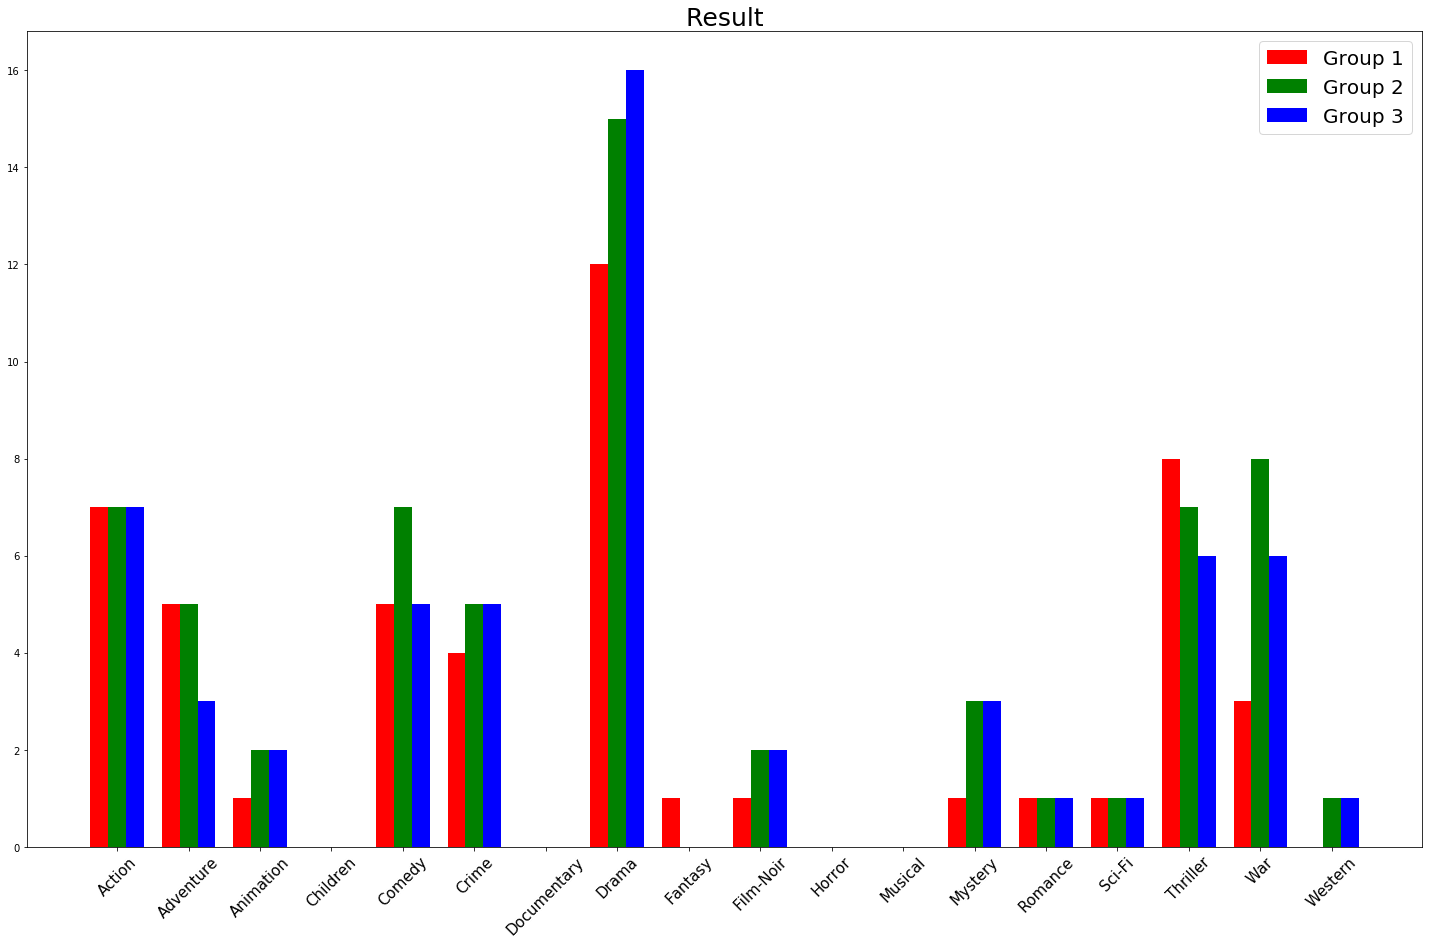

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

result = pd.read_csv('ml-1m/result.dat', ',')

genresLabel = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
genreNumber1 = np.arange(18)
genreNumber2 = []
genreNumber3 = []

barWidth = 0.25

for item in genreNumber1:
    genreNumber2.append(item + barWidth)
    genreNumber3.append(item + barWidth * 2)

genre1 = result.iloc[0, :].values
genre2 = result.iloc[1, :].values
genre3 = result.iloc[2, :].values

fig, ax = plt.subplots(figsize=(25,15))
bar1 = ax.bar(genreNumber1, genre1, width = barWidth, color='r')
bar2 = ax.bar(genreNumber2, genre2, width = barWidth, color='g')
bar3 = ax.bar(genreNumber3, genre3, width = barWidth, color='b')
ax.legend(['Group 1', 'Group 2', 'Group 3'],fontsize=20)
ax.set_xticks(genreNumber2)
ax.set_xticklabels(genresLabel, fontSize=15, rotation=45)

#def autolabel(rects):
#   """Attach a text label above each bar in *rects*, displaying its height."""
#  for rect in rects:
#        height = rect.get_height()
#        ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom',)

#autolabel(bar1)
#autolabel(bar2)
#autolabel(bar3)
plt.title('Result', fontSize = 25)
plt.show()
